In [24]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import os
from result_totals import plot_results
import requests
from config import google_key
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

def import_data():
    global file_path 
    file_path = os.path.join("CSVs",'election_data_clean.csv')
    global elec_data
    elec_data = pd.read_csv(file_path,index_col=0,dtype = {3:str,4:str})
    global contests 
    contests = elec_data.groupby('Contest Code')
    global precincts
    precincts = elec_data.groupby('Precinct_Full_ID')
    

import_data()


In [25]:
results = plot_results(contest_name='State Representative',district=29,by_Precinct=True)['Response']
data = results['Data']
dist_29_precincts = [precincts.get_group(doc['scope'])['Precinct Polling Location'].unique()[0].split(' ',maxsplit=1) for doc in data]

In [26]:
place_url = 'https://maps.googleapis.com/maps/api/place/findplacefromtext/json?'
details_url = 'https://maps.googleapis.com/maps/api/place/details/json?'


In [27]:
pct_locations = []
for i in range(len(dist_29_precincts)):
    url= place_url + f'input={dist_29_precincts[i][1]}' + '&'+ 'inputtype=textquery' +'&' + f'key={google_key}'
    place_id = requests.get(url).json()['candidates'][0]['place_id']
    search_url = details_url + f'place_id={place_id}' +'&' + f'key={google_key}'
    response = requests.get(search_url).json()
    pct_locations.append({dist_29_precincts[i][0]:{'name':response['result']['name'],'location': response['result']['geometry']['location']}})

In [28]:
for doc in pct_locations:
    pct_id = list(doc.keys())[0]
    name = doc[pct_id]['name']
    location = doc[pct_id]['location']
    print(f"{pct_id}:{name} = {location}")

001:Seminole Community Church = {'lat': 28.82695199999999, 'lng': -81.349542}
002:Lighthouse Baptist Church = {'lat': 28.83761599999999, 'lng': -81.635543}
003:Crossings Community Church = {'lat': 28.8048119, 'lng': -81.36462990000001}
004:Safeharbor Christian Church = {'lat': 28.7970234, 'lng': -81.3171478}
005:Westview Baptist Church = {'lat': 28.7873947, 'lng': -81.3241384}
006:Westside Community Center/ Boys And Girls Center = {'lat': 28.8036252, 'lng': -81.28848839999999}
007:Markham Woods Presbyterian Church = {'lat': 28.7755855, 'lng': -81.3818155}
008:Courtyard by Marriott Orlando Lake Mary/North = {'lat': 28.757089, 'lng': -81.36665699999999}
009:Holy Cross Lake Mary = {'lat': 28.7575806, 'lng': -81.3533444}
010:The Lake Mary Events Center = {'lat': 28.76215, 'lng': -81.3230639}
011:Florida Department of Health in Seminole County - Sanford Location = {'lat': 28.7739106, 'lng': -81.2852905}
012:Markham Woods Seventh-day Adventist Church = {'lat': 28.7032167, 'lng': -81.3850056}

In [37]:
lat = []
lng = []
size = []
dem = []
for x in range(len(data)):
    doc = data[x]
    pct = list(pct_locations[x].keys())[0]
    pct_location = pct_locations[x][pct]['location']
    lat.append(pct_location['lat'])
    lng.append(pct_location['lng'])
    total = sum(doc['y'])
    size.append(total)
    dem.append(doc['y'][1]/total)

    
pct_names = [p[0]+" "+p[1] for p in dist_29_precincts]
SH_29_results = pd.DataFrame({'Precinct':pct_names , 'Latitude':lat , 'Longitude':lng,'Vote Total':size,'Percent Dem':dem})
SH_29_results['Latitude'][1]=28.685091
SH_29_results['Longitude'][1]=-81.342816
SH_29_results['Latitude'][17]=28.777739
SH_29_results['Longitude'][17]=-81.384555
SH_29_results['Latitude'][20]=28.694080
SH_29_results['Longitude'][20]=-81.445803
SH_29_results['Latitude'][24]=28.680747
SH_29_results['Longitude'][24]=-81.459606
print(SH_29_results)



SH_29_results.to_csv(os.path.join('CSVs','SH29_results.csv'))
SH_29_results.to_csv(os.path.join('..','docs','data','SH29_results.csv'))   
SH_29_results.to_json(os.path.join('..','docs','data','SH29_results.json'))     

                          Precinct   Latitude  Longitude  Vote Total  \
0    001 Seminole Community Church  28.826952 -81.349542        1659   
1    002 Lighthouse Baptist Church  28.685091 -81.342816        2829   
2   003 Crossings Community Church  28.804812 -81.364630        3624   
3   004 Safeharbor Christian Churc  28.797023 -81.317148        2448   
4      005 Westview Baptist Church  28.787395 -81.324138        3186   
5    006 Westside Community Center  28.803625 -81.288488        2060   
6   007 Markham Woods Presbyterian  28.775585 -81.381816        4042   
7        008 Courtyard by Marriott  28.757089 -81.366657        1923   
8   009 Holy Cross Lutheran Church  28.757581 -81.353344        2458   
9      010 Lake Mary Events Center  28.762150 -81.323064        3914   
10  011 Seminole County Health Dep  28.773911 -81.285291        2761   
11  012 Markham Woods SDA Church D  28.703217 -81.385006        2890   
12   013 Church of Jesus Christ of  28.734281 -81.357993        

C:\Users\spear_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\spear_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\spear_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\spear_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWar

**The following polling places were incorrectly identified by the google maps API.  Correct
coordinates were found manually and were corrected in the code above.**
[1]Lighthouse Baptist Church: 28.685091, -81.342816
[17]First Baptist Church: 28.777739, -81.384555
[20]West Branch Library: 28.694080, -81.445803
[24]Beth Am: 28.680747, -81.459606



In [30]:
def zscore(x,x_mean,x_std):
    return (x-x_mean)/x_std

lat_mean = np.mean(lat)
lat_std = np.std(lat)
lat_norm = [zscore(x,lat_mean,lat_std) for x in lat]

lng_mean = np.mean(lng)
lng_std = np.std(lng)
lng_norm = [zscore(x,lng_mean,lng_std) for x in lng]

size_adj = [75*x for x in size/np.mean(size)]

blue = [0,0,1]
red = [1,0,0]
colors = []

dem_adj = [0.5+np.sign((x - 0.5))*(abs(2*((x - 0.5)))**0.6)/2 for x in dem]
for r in dem_adj:
    blue_part = [float(r)*x for x in blue]
    red_part = [float(1-r)*x for x in red]
    new_color = [sum(x) for x in zip(blue_part,red_part)]
    colors.append(new_color)

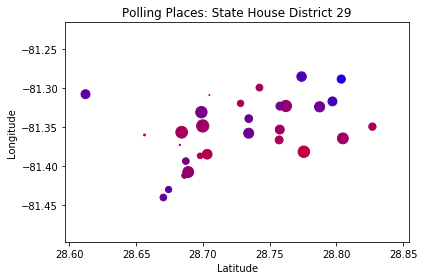

In [31]:
plt.scatter(lat,lng,s=size_adj,c=colors)
plt.xlim(lat_mean-0.359*lat_std,lat_mean-0.26*lat_std)
plt.ylim(lng_mean-0.03*lng_std,lng_mean+0.1*lng_std)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Polling Places: State House District 29')
plt.tight_layout(pad=1.08)
plt.savefig(os.path.join('..','docs','Visualizations','SH29_precinct_party_affiliation.png'))
plt.show()

['001 Seminole Community Church',
 '002 Lighthouse Baptist Church',
 '003 Crossings Community Church',
 '004 Safeharbor Christian Churc',
 '005 Westview Baptist Church',
 '006 Westside Community Center',
 '007 Markham Woods Presbyterian',
 '008 Courtyard by Marriott',
 '009 Holy Cross Lutheran Church',
 '010 Lake Mary Events Center',
 '011 Seminole County Health Dep',
 '012 Markham Woods SDA Church D',
 '013 Church of Jesus Christ of',
 '014 Northwest Branch Library',
 '015 Nativity Catholic Church',
 '016 Lake Mary City Hall',
 '017 Seminole County Co-op Exte',
 '018 First Baptist Church Sweet',
 '019 Longwood Community Buildin',
 '020 First Baptist Church of Lo',
 '021 West Branch Library DC',
 '022 Wekiva Presbyterian Church',
 '023 Neighborhood Alliance Chur',
 '024 WaterStone Church',
 '025 Congregation Beth Am DC',
 '026 First Baptist Ch. Sanlando',
 '027 Forest Lake SDA Church DC',
 '028 Central Church of Christ',
 '029 TITLE Boxing Club',
 '030 St. Stephen Lutheran Churc',
 "03

In [23]:
SH_29_results
[2,21,25,18]

,Precinct,Latitude,Longitude,Vote Total,Percent Dem,color
0,001 Seminole Community Church,28.826952,-81.349542,1659,0.433394,0.350824
1,002 Lighthouse Baptist Church,28.837616,-81.635543,2829,0.355956,0.263035
2,003 Crossings Community Church,28.804812,-81.364630,3624,0.454194,0.380837
3,004 Safeharbor Christian Churc,28.797023,-81.317148,2448,0.649510,0.742320
4,005 Westview Baptist Church,28.787395,-81.324138,3186,0.516008,0.563414
5,006 Westside Community Center,28.803625,-81.288488,2060,0.831068,0.890426
6,007 Markham Woods Presbyterian,28.775585,-81.381816,4042,0.339931,0.247552
7,008 Courtyard by Marriott,28.757089,-81.366657,1923,0.419657,0.333061
8,009 Holy Cross Lutheran Church,28.757581,-81.353344,2458,0.450773,0.375574
9,010 Lake Mary Events Center,28.762150,-81.323064,3914,0.469085,0.405879
